In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
data_path = "../logs"
exps = os.listdir(data_path)
results = {}

for exp in exps:
    try:
        nested_ = os.listdir(os.path.join(data_path, exp))
        file = os.path.join(data_path, exp, nested_[0], "train.log")
        data = pd.read_csv(file)

        # take all but last _s1, or _s2, or _s3 which are the seeds
        exp_name = "_".join(exp.split("_")[:-1])
        if exp_name not in results:
            results[exp_name] = []
        
        results[exp_name].append(data["episode_reward"])
    except:
        print(f"Error with {exp}")
        continue

In [31]:
# lets get the mean performance of the extrinsic agent. for the key that contains "extrinsic" compute mean and pop key 
extrinsic_performance = []
keys_to_pop = []
for key in results.keys():
    if "extrinsic" in key:
        # compute the mean for the last 100 episodes
        mean = np.mean([np.mean(x[-100:]) for x in results[key]])
        extrinsic_performance.append(mean)
        keys_to_pop.append(key)

for key in keys_to_pop:
   results.pop(key)

# plot the extrinsic curve
print(extrinsic_performance)

[703.5223333333333]


Key ppo_SuperMarioBros-1-1-v3_disagreement_obsRMS:False_rewNorm:rms_updateProp:1.0 has 3 runs of length 291
Key ppo_SuperMarioBros-1-1-v3_ngu_obsRMS:False_rewNorm:rms_updateProp:1.0 has 3 runs of length 187
Key ppo_SuperMarioBros-1-1-v3_pseudocounts_obsRMS:False_rewNorm:rms_updateProp:1.0 has 3 runs of length 226
Key ppo_SuperMarioBros-1-1-v3_re3_obsRMS:False_rewNorm:rms_updateProp:1.0 has 3 runs of length 285
Key ppo_SuperMarioBros-1-1-v3_revd_obsRMS:False_rewNorm:rms_updateProp:1.0 has 3 runs of length 362
Key ppo_SuperMarioBros-1-1-v3_ride_obsRMS:False_rewNorm:rms_updateProp:1.0 has 3 runs of length 268
Key ppo_SuperMarioBros-1-1-v3_e3b_obsRMS:False_rewNorm:rms_updateProp:1.0 has 3 runs of length 262
Key ppo_SuperMarioBros-1-1-v3_rise_obsRMS:False_rewNorm:rms_updateProp:1.0 has 1 runs of length 21
Key ppo_SuperMarioBros-1-1-v3_rnd_obsRMS:False_rewNorm:rms_updateProp:1.0 has 3 runs of length 291
Key ppo_SuperMarioBros-1-1-v3_icm_obsRMS:False_rewNorm:rms_updateProp:1.0 has 3 runs of l

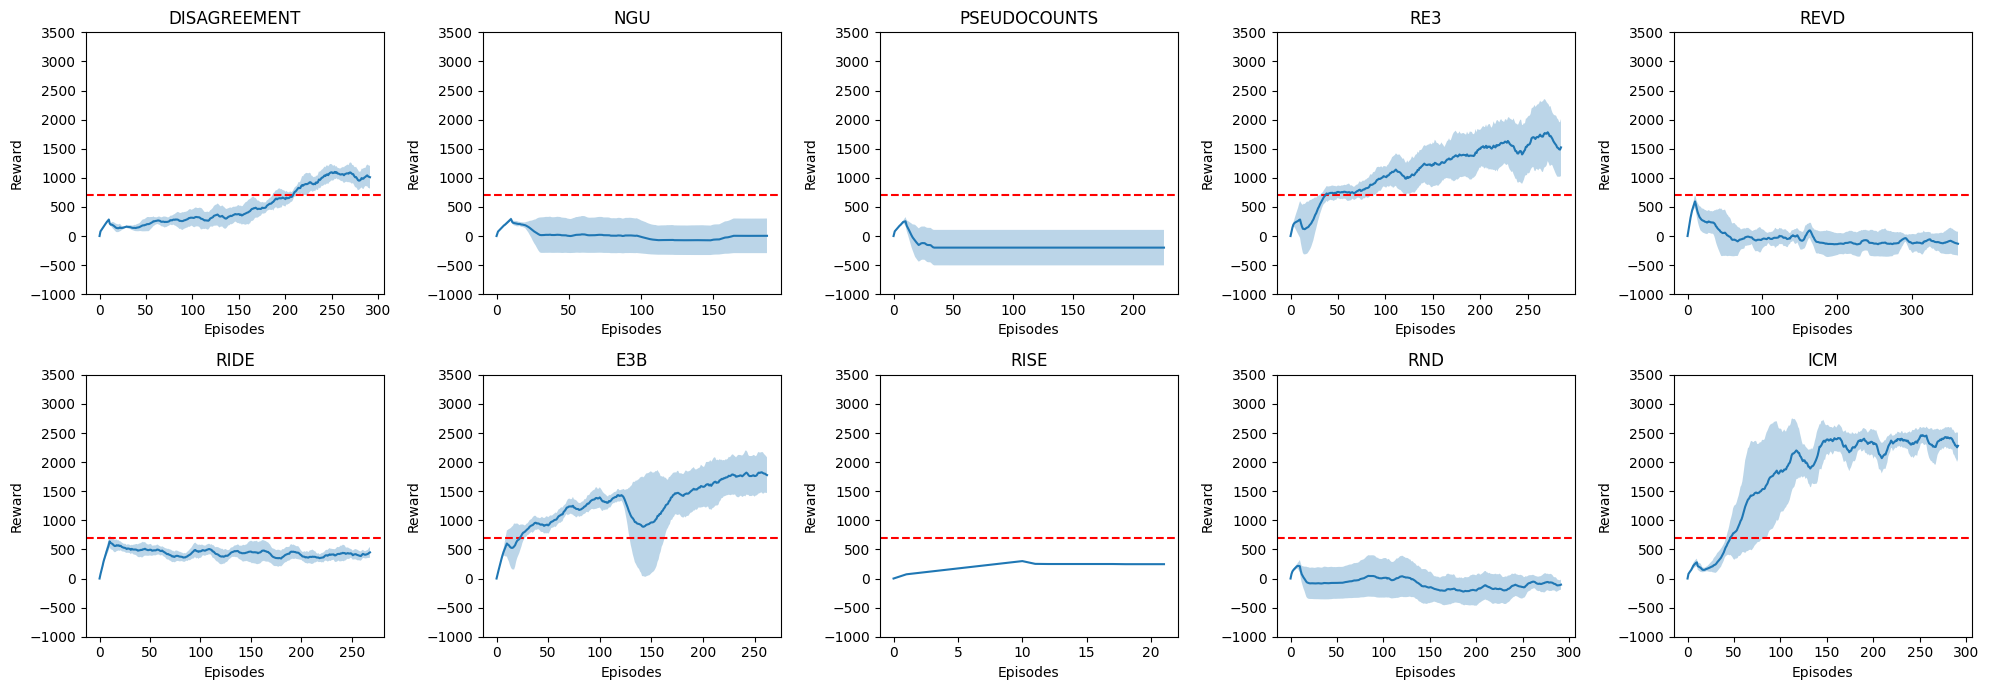

In [32]:
# make sure for each key in results, all the lists of rewards in the key are of the same length (which should be the max length common to all)
for key in results:
    min_len = min([len(x) for x in results[key]])
    results[key] = [x[:min_len] for x in results[key]]
    print(f"Key {key} has {len(results[key])} runs of length {min_len}")

# plot 11 subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 7))
axs = axs.ravel()

for i, key in enumerate(results):
    mean = np.mean(results[key], axis=0)
    std = np.std(results[key], axis=0)
    
    # append 0s to the beginning so that they start in the same place
    mean = np.append(np.zeros(10), mean)
    std = np.append(np.zeros(10), std)

    # smooth with np.convolve
    window = 10
    mean = np.convolve(mean, np.ones(window), 'valid') / window
    std = np.convolve(std, np.ones(window), 'valid') / window
    
    x = np.arange(len(mean))

    # plot line at the extrinsic performance
    axs[i].axhline(y=np.mean(extrinsic_performance), color="r", linestyle="--")

    algo_name = key.split("_")[2]

    axs[i].fill_between(x, mean - std, mean + std, alpha=0.3)
    axs[i].plot(x, mean)
    # y limit from 0 to 3500
    axs[i].set_ylim([-1000, 3500])
    axs[i].set_title(algo_name.upper())
    axs[i].set_xlabel("Episodes")
    axs[i].set_ylabel("Reward")
plt.tight_layout()

